# Exploring the number of neighbors in KNN

The goal of this notebook is to explore the number of neighbors in the KNN model, and its influence on the performance of the algorithm. For that, we will use the `penguins` dataset from `sklearn`.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import root_mean_squared_error

RANDOM_STATE = 123

In [2]:
DATASET_NAME = "penguins"
FEATURES = ["bill_length_mm", "bill_depth_mm", "flipper_length_mm"]
TARGET = ["body_mass_g"]

df = sns.load_dataset(DATASET_NAME)

df = df.reindex(FEATURES + TARGET, axis=1)
df = df.dropna()  

X = df.reindex(FEATURES, axis=1)
y = df.reindex(TARGET, axis=1)

X = X.values
y = y.values.ravel() 

x_train, x_test, y_train, y_test = train_test_split(
                    X, y, test_size=0.1, random_state=RANDOM_STATE)

With the training data defined, let's introduce the k-NN model. Since the focus is on understanding the influence of $k$ in the algorithm, we will vary the value of $k$ from 1 to 50, and then analyze the RMSE value of each model.

In [3]:
models = []

for k in range(1, 51):
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(x_train, y_train)
    models.append(model)

In [4]:
rmses = []

for i in range(1,51):
    y_pred = models[i-1].predict(x_test)
    rmse = root_mean_squared_error(y_test, y_pred)
    rmses.append(rmse)

Finally, we plot the RMSE of the models according to the number of neighbors utilzed in the model. 

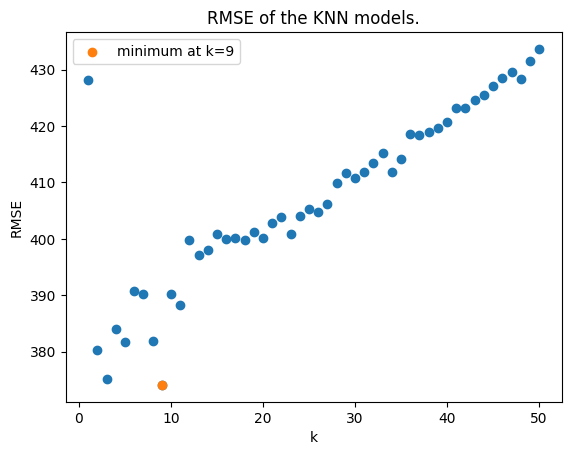

In [5]:
k = [i for i in range(1,51)]
min_rmse = min(rmses)

plt.scatter(k, rmses)
plt.title('RMSE of the KNN models.')
plt.xlabel('k')
plt.ylabel('RMSE')
plt.scatter(rmses.index(min_rmse) + 1, min_rmse, label=f'minimum at k={rmses.index(min_rmse) + 1}')
plt.legend()
plt.show()

We can see that the RMSE is minimum when $k=5$, for our case. The graph shows a increase tendency around $k=20$, which shows the loss of performance because of the fact that the model is just memorizing the data, losing generalization capacity. Overall, we notice how important it is to tune the hyperparameters of the ML models, as this is one of the things that lead to optimal performance.  